# Cats and Dogs

In [1]:
import os                        # OS依存の処理を共通化するモジュール
import glob                      # ファイルやフォルダを操作する際の便利なモジュール
import numpy as np               # 数値計算用モジュール
import matplotlib.pyplot as plt  # 図形描画用モジュール

In [2]:
# Jupyter の notebook 内で図形を表示するために必要な指示
# 注意： Python のコードとして動かすときには次の行を削除しておくこと！
%matplotlib inline

In [3]:
# Deep Learning の基本ライブラリである Tensorflow を使いやすくするための Keras を導入する
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
# 画像を読み込んでデータとラベルを順に追加するためのリスト（入れ物）
images = []
labels = []

def glob_images(dir, label, img_size, max_count):
    files = glob.glob(dir + "/*.jpg")
    for count, f in enumerate(files):
        img = load_img(f, target_size=(img_size, img_size))
        img = img.convert("RGB")
        
        # 画像を行列に変換する ary.shape ⇒ (img_size, phoimg_sizeto_size, 3)
        ary = img_to_array(img)
                
        images.append(ary)     # データをリストに追加
        labels.append(label)   # ラベルをリストに追加
        
        if count >= max_count - 1:
            break

In [5]:
path = "./cats_and_dogs_small/train/"

label = 0
label_names = []

# 変換後の画像のサイズ (縦と横は同じに設定) [この値を変更して再実行してみる]
img_size = 75

# 各フォルダ内で読み込む画像枚数
max_count = 200    # 500 や 1000 に変更して、test データの予測精度を比較する

for name in os.listdir(path):
    if os.path.isdir(path + name):
        label_names.append(name)
        print("path : ", path + name)
        print("label: ", label)
        glob_images(path + name, label, img_size, max_count)
        print(labels.count(label))
        label += 1

# numpy の array形式に変換
images = np.asarray(images)
labels = np.asarray(labels)

# 画像データを整数型から浮動小数点型に変換し、正規化 (0～255 ⇒ 0.0～1.0)
images = images.astype(np.float32) / 255.0

path :  ./cats_and_dogs_small/train/cats
label:  0
200
path :  ./cats_and_dogs_small/train/dogs
label:  1
200


### ヒント:
各フォルダ内で読み込む画像枚数： <font color='red'>**max_count**</font> を 200 から 500 や 1000 に変更して、最後のセルで計算される test データの予測精度を比較する

In [6]:
# ラベルの種類数
classes = len(label_names)
print("ラベルの種類数 : ", classes)

# ラベルをone-hotベクトル形式に変換
labels = np_utils.to_categorical(labels, classes)

ラベルの種類数 :  2


In [7]:
print(images.shape)
print(labels.shape)

(400, 75, 75, 3)
(400, 2)


In [8]:
# データを訓練用と検証用とに分けるモジュール
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=0)

print("X_train: ", len(X_train))
print("y_train: ", len(y_train))
print("X_test : ", len(X_test))
print("y_test : ", len(y_test))

X_train:  280
y_train:  280
X_test :  120
y_test :  120


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

# Sequentialタイプのモデルを生成
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(classes, activation='softmax'))

# モデルをコンパイル
model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# モデルのサマリを表示
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [11]:
batch_size = 32    # バッチサイズ
epochs     = 50    # 学習回数

# 開始時刻を記録
import time
start = time.time()

# モデルの訓練（学習）
# https://keras.io/ja/models/sequential/
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    verbose=1)

# 経過時間を表示
elapsed_time = time.time() - start
print("Elapsed Time : {0}".format(elapsed_time) + "[sec]")

Instructions for updating:
Use tf.cast instead.
Train on 280 samples, validate on 120 samples
Epoch 1/50
280/280 [==============================] - 3s 9ms/step - loss: 0.7041 - acc: 0.5250 - val_loss: 0.7059 - val_acc: 0.4750
Epoch 2/50
280/280 [==============================] - 0s 434us/step - loss: 0.6874 - acc: 0.5714 - val_loss: 0.6972 - val_acc: 0.4750
Epoch 3/50
280/280 [==============================] - 0s 417us/step - loss: 0.6656 - acc: 0.6214 - val_loss: 0.6963 - val_acc: 0.5083
Epoch 4/50
280/280 [==============================] - 0s 437us/step - loss: 0.6079 - acc: 0.6857 - val_loss: 0.6915 - val_acc: 0.5833
Epoch 5/50
280/280 [==============================] - 0s 377us/step - loss: 0.5508 - acc: 0.7321 - val_loss: 0.6855 - val_acc: 0.5917
Epoch 6/50
280/280 [==============================] - 0s 387us/step - loss: 0.4884 - acc: 0.7571 - val_loss: 0.7189 - val_acc: 0.5667
Epoch 7/50
280/280 [==============================] - 0s 387us/step - loss: 0.4308 - acc: 0.7893 - val_l

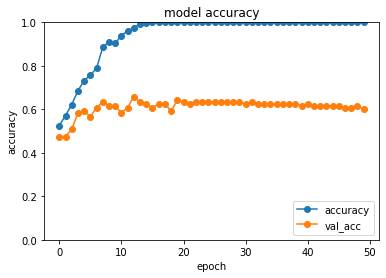

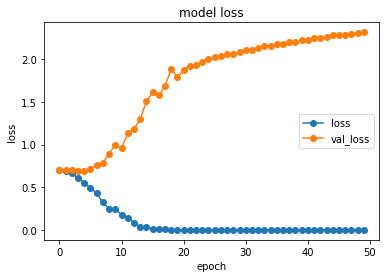

In [12]:
# 現在の時刻をファイル名に挿入するための準備
import datetime
now = datetime.datetime.today().strftime('%Y_%m_%d_%H%M%S')

# 精度の履歴をプロット
plt.ylim(0.0, 1.0)
plt.plot(history.history['acc']    , "o-", label="accuracy")  # 訓練データの精度
plt.plot(history.history['val_acc'], "o-", label="val_acc")   # テストデータの精度
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc="lower right")

# 精度のグラフを画像として保存
filename = '04_keras_cnn_cats_and_dogs_Simple_acc_' + now + '.png'
plt.savefig(filename)

plt.figure()

# 損失の履歴をプロット
plt.plot(history.history['loss']    , "o-", label="loss")      # 訓練データの損失
plt.plot(history.history['val_loss'], "o-", label="val_loss")  # テストデータの損失
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='center right')

# 損失のグラフを画像として保存
filename = '04_keras_cnn_cats_and_dogs_Simple_loss_' + now + '.png'
plt.savefig(filename)

plt.show()

In [13]:
# 学習済みの識別器を評価するための画像セットのパス
path = "./cats_and_dogs_small/test/"

images = []
labels = []

max_count = 200
label = 0

for name in os.listdir(path):
    if os.path.isdir(path + name):
        print("path : ", path + name)
        print("label: ", label)
        glob_images(path + name, label, img_size, max_count)
        print(labels.count(label))
        label += 1

# numpy の array形式に変換
images = np.asarray(images)
labels = np.asarray(labels)

# 画像データを整数型から浮動小数点型に変換し、正規化 (0～255 ⇒ 0.0～1.0)
images = images.astype(np.float32) / 255.0

# ラベルをone-hotベクトル形式に変換
labels = np_utils.to_categorical(labels, classes)

# 学習済みの識別器を評価
loss, accuracy = model.evaluate(images, labels)
print("accuracy: {}".format(accuracy))
print("loss    : {}".format(loss))

path :  ./cats_and_dogs_small/test/cats
label:  0
200
path :  ./cats_and_dogs_small/test/dogs
label:  1
200
400/400 [==============================] - 0s 191us/step
accuracy: 0.5475
loss    : 2.726730937957764
